In [38]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot



In [39]:
data_train = pd.read_csv('/content/trac2_hin_train.csv')
data_train.head()

ID  ... Sub-task B
0     C4.131  ...       NGEN
1     C4.638  ...       NGEN
2    C38.598  ...       NGEN
3  C4.2101.1  ...       NGEN
4   C29.14.2  ...       NGEN

[5 rows x 4 columns]

In [40]:

data_test = pd.read_csv('/content/trac2_hin_dev.csv')


In [41]:
data_train.drop(['ID','Sub-task B'], axis=1, inplace=True)
data_test.drop(['ID','Sub-task B'], axis=1, inplace=True)




In [42]:
NAG_train = data_train[(data_train['Sub-task A']=='NAG')]
OAG_train = data_train[(data_train['Sub-task A']=='CAG')]
CAG_train = data_train[(data_train['Sub-task A']=='OAG')]

In [43]:
NAG_test = data_test[(data_test['Sub-task A']=='NAG')]
OAG_test= data_test[(data_test['Sub-task A']=='CAG')]
CAG_test = data_test[(data_test['Sub-task A']=='OAG')]

In [44]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_train["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_train["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_train["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

#NAG_train.head()

In [45]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_test["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_test["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_test["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

NAG_test.head()

Text  Sub-task A
1   Bhaiya shaadi mein zaroor aana movie ka plot j...           0
2   Section 375 hai kya??? .... Ye to batate kam s...           0
4              Maine itni kam dislike kbhi nhii dekhi           0
7   जिश देश मे super30 जैसी फ़िल्म फ्लॉप ओर कबीर सि...           0
11            Bhai movie review 5 se 7 mins Bano yaar           0

In [46]:
data_train = pd.concat([NAG_train,
                 OAG_train,
                  CAG_train
                ],axis=0)

data_train.reset_index(inplace=True)

In [47]:
data_test = pd.concat([NAG_test,
                  OAG_test,
                  CAG_test
                 ],axis=0)

data_test.reset_index(inplace=True)

In [48]:

data_test = data_test.rename(columns = {'Sub-task A': 'label'}, inplace = False)

In [49]:

data_train = data_train.rename(columns = {'Sub-task A': 'label'}, inplace = False)

In [50]:
data_train

index                                               Text  label
0         0  Bollywood film dekhne ke samay logic ghar mein...      0
1         1                                   Chutiya movie...      0
2         4       Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने      0
3         5  @Pankaj Chauhan abey tum jse aadmiyo ko ye lgt...      0
4        10                 bro house of card ka review karona      0
...     ...                                                ...    ...
3979   3957                                    Teri gand chodu      2
3980   3966                Kutti aur rand ko insult mat karna.      2
3981   3970  jo jo film dekh ke khudko kabir singh samaj ra...      2
3982   3976        Ye chutiya khud is beemari se paresaan hai.      2
3983   3978                                          Chutiye..      2

[3984 rows x 3 columns]

In [51]:
data_train.drop(['index'], axis=1, inplace=True)

In [52]:
X = data_train.Text
Y = data_train.label
le = LabelEncoder()
#Y = le.fit_transform(Y)
#Y = Y.reshape(-1,1)

In [53]:
X_train,X_valid,y_train,y_valid = train_test_split(X,Y,test_size=0.15)

In [54]:

print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(len(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(len(y_valid)))

Train data len:3386
Class distribution3386
Valid data len:598
Class distribution598


In [55]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[1, 2674, 170, 169]]


In [56]:

x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(data_test['Text'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=150)
x_valid = pad_sequences(x_valid, padding='post', maxlen=150)
x_test = pad_sequences(x_test, padding='post', maxlen=150)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(data_test['label'].tolist())

#print('Train data len:'+str(len(x_train)))
#print('Class distribution'+str(Counter(train_labels)))

#print('Validation data len:'+str(len(x_valid)))
#print('Class distribution'+str(Counter(valid_labels)))

#print('Test data len:'+str(len(x_test)))
#print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [57]:

max_features =50000
embedding_dim =16
sequence_length = 150

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,\
                                                             kernel_regularizer=regularizers.l2(0.005),\
                                                             bias_regularizer=regularizers.l2(0.005)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(8, activation='relu',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))


model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.Accuracy()])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 16)           800016    
_________________________________________________________________
dropout_3 (Dropout)          (None, 150, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 16)           2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1229312   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                

In [58]:

tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [59]:
epochs = 30
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/30
4/4 [==============================] - 7s 838ms/step - loss: 4.2234 - accuracy: 0.0000e+00 - val_loss: 3.5441 - val_accuracy: 0.0000e+00
Epoch 2/30
4/4 [==============================] - 3s 638ms/step - loss: 3.3993 - accuracy: 0.0000e+00 - val_loss: 2.8372 - val_accuracy: 0.0000e+00
Epoch 3/30
4/4 [==============================] - 3s 647ms/step - loss: 2.7209 - accuracy: 0.0000e+00 - val_loss: 2.2756 - val_accuracy: 0.0000e+00
Epoch 4/30
4/4 [==============================] - 3s 637ms/step - loss: 2.1861 - accuracy: 0.0000e+00 - val_loss: 1.8494 - val_accuracy: 0.0000e+00
Epoch 5/30
4/4 [==============================] - 3s 641ms/step - loss: 1.7844 - accuracy: 0.0000e+00 - val_loss: 1.5461 - val_accuracy: 0.0000e+00
Epoch 6/30
4/4 [==============================] - 3s 626ms/step - loss: 1.5031 - accuracy: 0.0875 - val_loss: 1.3532 - val_accuracy: 0.5117
Epoch 7/30
4/4 [==============================] - 3s 638ms/step - loss: 1.3300 - accuracy: 0.3607 - val_loss: 1.2595 - v

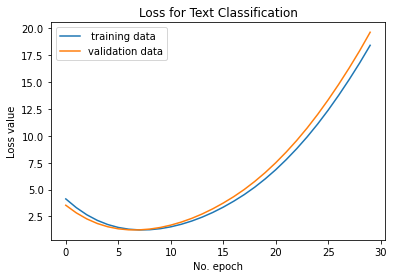

In [60]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [61]:

x_test  = np.array( tokenizer.texts_to_sequences(data_test['Text'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=150)


In [62]:
print("Generate predictions for all samples")
predictions = model.predict(x_test)

Generate predictions for all samples


In [63]:

data_test['pred_sentiment']= predictions

In [64]:

labels = [0,1,2]
    
print(classification_report(data_test['label'].tolist(),data_test['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73       578
           1       0.00      0.00      0.00       211
           2       0.00      0.00      0.00       208

    accuracy                           0.58       997
   macro avg       0.19      0.33      0.24       997
weighted avg       0.34      0.58      0.43       997

